<a href="https://colab.research.google.com/github/jlgrons/CELEHS-DSinA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MedMNIST dataset is licensed under Creative Commons Attribution 4.0 International (CC BY 4.0). The dataset is from the following paper:

* Jiancheng Yang, Rui Shi, Donglai Wei, Zequan Liu, Lin Zhao, Bilian Ke, Hanspeter Pfister, Bingbing Ni. "MedMNIST v2: A Large-Scale Lightweight Benchmark for 2D and 3D Biomedical Image Classification". arXiv preprint arXiv:2110.14795, 2021.
* Jiancheng Yang, Rui Shi, Bingbing Ni. "MedMNIST Classification Decathlon: A Lightweight AutoML Benchmark for Medical Image Analysis". IEEE 18th International Symposium on Biomedical Imaging (ISBI), 2021.

The MedMNIST dataset contains medical imaging data ranging from colonoscopy imaging to abdominal CT scans to breast ultrasounds.  There two main types of data formats that are used: 2 dimensional images and 3 dimensional.  In this notebook, we will explore the Chest X-Ray data within the MedMNIST dataset:

**Required packages**

In [ ]:
! pip install medmnist
! pip install keras

from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import torchvision.transforms as transforms
import numpy as np
import random

import medmnist
from medmnist import INFO, Evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Loading in the Dataset**

In [ ]:
def get_loader(dataset, batch_size):
    total_size = len(dataset)
    print('Size', total_size)
    index_generator = shuffle_iterator(range(total_size))
    while True:
        data = []
        for _ in range(batch_size):
            idx = next(index_generator)
            data.append(dataset[idx])
        yield dataset._collate_fn(data)


def shuffle_iterator(iterator):
    # iterator should have limited size
    index = list(iterator)
    total_size = len(index)
    i = 0
    random.shuffle(index)
    while True:
        yield index[i]
        i += 1
        if i >= total_size:
            i = 0
            random.shuffle(index)
  
data_flag = 'chestmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 64

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = get_loader(dataset=test_dataset, batch_size=BATCH_SIZE)

print(train_dataset)

training_images = np.array([np.array(elem[0]) for elem in train_dataset])
training_labels = np.array([np.array(elem[1]) for elem in train_dataset])
testing_images = np.array([np.array(elem[0]) for elem in test_dataset])
testing_labels = np.array([np.array(elem[1]) for elem in test_dataset])

Using downloaded and verified file: /root/.medmnist/chestmnist.npz
Using downloaded and verified file: /root/.medmnist/chestmnist.npz
Using downloaded and verified file: /root/.medmnist/chestmnist.npz
(1, 28, 28)


You don't need to worry about understanding the functions get_loader and shuffle_iterator (those are for simply loading in the data from MedMNIST).  If you want to laern more about the dataset itself as well as the code and paper you can visit the MedMNIst website at https://medmnist.com/.  The above code segment prints the summary of the training dataset and separates the datasets into the respective images and labels.  We will look into the images and labels in more detail.

Task: get a summary of the testing dataset (hint. look how we printed the training dataset summary above)

Let's now take a look at inidividual pictures.  We can look at the images with and without colors.  You can edit the parameter length to display however many images you want.  For example, if you wanted to see five images you can change it to train_dataset.montage(length=5).  Feel free to play around with this to see what the actual images look like

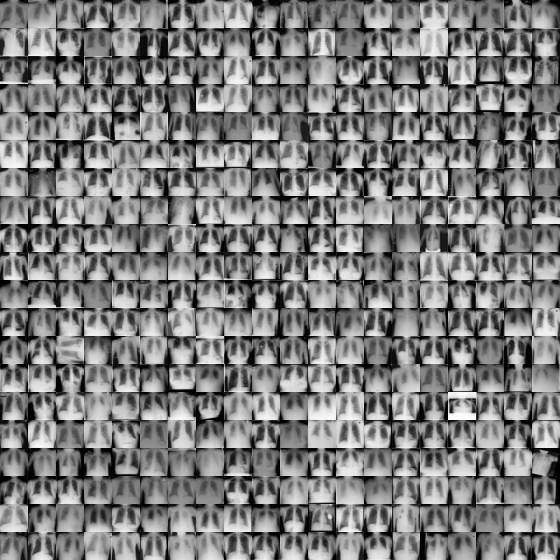

In [ ]:
# Display many images
train_dataset.montage(length=20)


These images are the grayscale images.  Similar to above, you can set i to whatever image to see what it looks like.  i represents the index of the image in the dataset.  This means if i is 3, then the image displayed will be the 3rd image in the dataset

label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


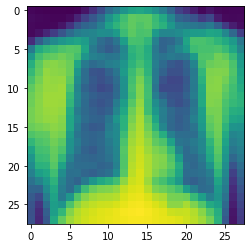

In [ ]:
# Look at one image
from matplotlib import pyplot as plt

i=300

print('label: ' + str(training_labels[i]))
plt.imshow(training_images[i][0])
plt.show()

Now, let's look at the labels of these images. Printing the dataset will give us an overview of what the labels are and what they mean.

In [ ]:
print(training_dataset)
labels = []
for label in training_labels:
  if 1 not in list(label):
    labels.append(0)
  else:
    ind = list(label).index(1)
    labels.append(ind)

NameError: ignored

Fill out the following dictionary. (hint. follow the same format as the first example and look at the labels from the printed dataset above)

In [ ]:
number_classes = {
  'atelectasis': labels.count(0),
  'cardiomegaly': ,
  'effusion': ,
  'infiltration': ,
  'mass': ,
  'nodule': ,
  'pneumonia': ,
  'pneumothorax': ,
  'consolidation': ,
  'edema': ,
  'emphysema': ,
  'fibrosis': ,
  'pleural': ,
  'hernia': ,
}


In [ ]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');
plt.xticks(rotation='vertical')